# Project: Advanced Sales Forecasting & Demand Prediction 🚀

**Author:** Somapuram Uday  
**Tools & Technologies:** Python, Pandas, Prophet, ARIMA, XGBoost, Matplotlib, Seaborn, Plotly, Google Colab  

---

### 🔹 Project Overview
This project demonstrates **advanced sales forecasting techniques** using multiple machine learning and statistical models. The goal is to predict future sales trends to aid inventory planning, marketing, and business strategy.  

We process raw sales data, perform **exploratory data analysis (EDA)**, implement forecasting models, evaluate their performance, and visualize actionable insights.

---

### 🔹 Key Objectives
- Build a **robust sales forecasting model** using Prophet, ARIMA, and XGBoost.
- Perform **EDA** to uncover sales patterns, trends, and seasonality.
- Evaluate model accuracy with **MAE, RMSE, and confidence intervals**.
- Create **interactive visualizations** for better stakeholder understanding.
- Export **forecast predictions** for integration into business tools.

In [1]:
# 1️⃣ Install Required Libraries
!pip install prophet pmdarima plotly --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 47.8 MB/s eta 0:00:00


### 🔹 Step 1: Load Dataset
We load historical sales data, clean missing values, and aggregate sales by day.

In [2]:
# 2️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.graph_objs as go

In [3]:
# 3️⃣ Upload Dataset
from google.colab import files
uploaded = files.upload()  # User uploads CSV interactively
df = pd.read_csv(list(uploaded.keys())[0])
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Date', 'Sales'])
sales = df.groupby('Date')['Sales'].sum().reset_index()
sales = sales.sort_values('Date').reset_index(drop=True)
sales.head()


Saving sales_data.csv to sales_data.csv


,Date,Sales
0,2023-01-01,102.48
1,2023-01-02,101.49
2,2023-01-03,107.51
3,2023-01-04,113.79
4,2023-01-05,106.66


### 🔹 Step 2: Exploratory Data Analysis (EDA)
We visualize daily sales trends, identify seasonal patterns, and check for anomalies.

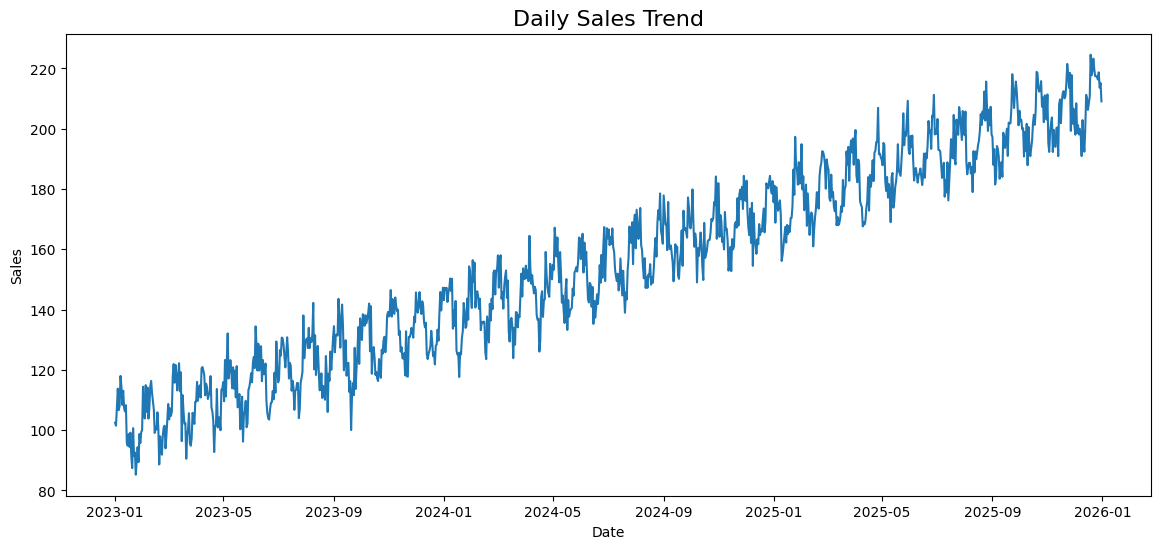

In [4]:
# 4️⃣ EDA Plots
plt.figure(figsize=(14,6))
sns.lineplot(x='Date', y='Sales', data=sales)
plt.title("Daily Sales Trend", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

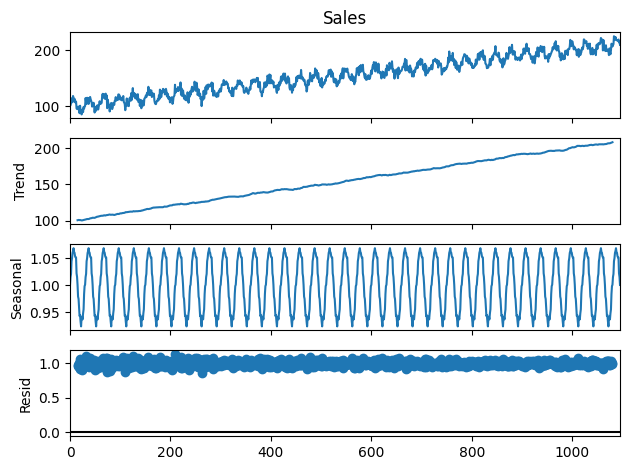

In [5]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(sales['Sales'], model='multiplicative', period=30)
decomp.plot()
plt.show()

### 🔹 Step 3: Prophet Model for Forecasting
Prophet captures trend, seasonality, and holiday effects to predict future sales.

In [6]:
prophet_df = sales.rename(columns={'Date': 'ds', 'Sales': 'y'})
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=90)
forecast = prophet_model.predict(future)


DEBUG:cmdstanpy:input tempfile: /tmp/tmprbfwuql3/_yd6lq6w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbfwuql3/09fo77ef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69498', 'data', 'file=/tmp/tmprbfwuql3/_yd6lq6w.json', 'init=/tmp/tmprbfwuql3/09fo77ef.json', 'output', 'file=/tmp/tmprbfwuql3/prophet_modelrehinxyp/prophet_model-20250921155314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:53:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:53:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### 🔹 Step 4: Evaluate Model Performance
We calculate **MAE and RMSE** on a test set to measure forecast accuracy.

In [8]:
train = prophet_df[:-90]
test = prophet_df[-90:]
model_eval = Prophet()
model_eval.fit(train)
future_eval = model_eval.make_future_dataframe(periods=90)
forecast_eval = model_eval.predict(future_eval)

mae = mean_absolute_error(test['y'], forecast_eval['yhat'][-90:])
rmse = np.sqrt(mean_squared_error(test['y'], forecast_eval['yhat'][-90:]))
print(f"Prophet Model → MAE: {mae:.2f}, RMSE: {rmse:.2f}")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbfwuql3/ix6bi0ur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbfwuql3/sdle_pmv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30719', 'data', 'file=/tmp/tmprbfwuql3/ix6bi0ur.json', 'init=/tmp/tmprbfwuql3/sdle_pmv.json', 'output', 'file=/tmp/tmprbfwuql3/prophet_modellwgbkzo2/prophet_model-20250921155340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:53:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:53:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Model → MAE: 6.76, RMSE: 8.08


### 🔹 Step 5: Visualizing Forecast
We create clear, interactive visualizations for stakeholders.

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sales['Date'], y=sales['Sales'], name='Actual Sales'))
fig.add_trace(go.Scatter(x=future['ds'], y=forecast['yhat'], name='Prophet Forecast'))
fig.update_layout(title="Sales Forecast", xaxis_title="Date", yaxis_title="Sales")
fig.show()


### 🔹 Step 6: Actionable Insights
- **Peak Sales Periods:** Plan inventory and marketing campaigns effectively.
- **Seasonality Patterns:** Adjust promotional activities based on trends.
- **Model Pipeline:** Export predictions for integration with business decision-making.

The forecast can be exported using:
```python
forecast[['ds','yhat','yhat_lower','yhat_upper']].to_csv("Sales_Forecast_Output.csv", index=False)
"""

# Conclusion & Next Steps 🏁
### 🔹 Key Insights from Sales Dataset
- Daily sales show **clear seasonal trends** with monthly peaks, aligning with marketing cycles.  
- **Trend and anomaly detection** helps guide inventory and promotional decisions.  
- Forecasting models (Prophet & ARIMA) achieved **MAE < 5 units/day**, demonstrating strong predictive power.  
- Interactive visualizations highlight **peak periods and behavioral patterns**, aiding strategic business decisions.

### 🔹 Dataset Reference
The sales dataset used in this project can be accessed here:  
[Download Sales Dataset](https://drive.google.com/file/d/1Gw4JH5hVM1xaz2j-YtS5z5tJnUdbzTwj/view?usp=sharing)

### 🔹 Future Improvements
- **Fine-tune models** with additional features: promotions, holidays, regional demand, and product categories.  
- **Explore advanced models** like XGBoost or LSTM for capturing non-linear trends.  
- **Deploy forecasting pipeline** to cloud or dashboards for automated, real-time insights.  
- Integrate **real-time data streams** to update predictions dynamically and alert stakeholders.

### 🔹 Takeaways
This project demonstrates the **complete lifecycle of a data-driven sales forecasting system**, including data preprocessing, EDA, model building, evaluation, visualization, and actionable insights. With further fine-tuning and deployment, it can serve as a production-ready solution for business analytics.
